<a href="https://colab.research.google.com/github/valerymamontov/colab_notebooks/blob/main/Maps_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.6MB/s 
     |████████████████████████████████| 14.7MB 305kB/s 
     |████████████████████████████████| 10.9MB 2.7MB/s 


In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes

data = gpd.read_file("https://video.ittensive.com/python-advanced/moscow.json")
data = data.to_crs({'init' : 'epsg:3857'})
data

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"MULTIPOLYGON (((4096902.352 7447896.604, 40969..."
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((4166426.940 7508453.808, 4166520.448..."
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((4096954.672 7450014.341, 4097059.312..."
3,Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((4111834.748 7408856.639, 4111836.974..."
4,"""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((4167752.755 7484578.556, 4167821.773..."
...,...,...,...,...,...,...,...,...
141,Ивановское,45263567,45306000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((4207855.601 7511245.059, 4207855.601..."
142,Косино-Ухтомский,45263573,45308000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((4211886.480 7500856.670, 4211906.518..."
143,Новокосино,45263579,45310000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((4212376.286 7504949.853, 4212399.663..."
144,Некрасовка,45290574,45391000,Юго-Восточный,45290000,ЮВАО,Муниципальный округ,"POLYGON ((4219691.090 7500161.183, 4219789.051..."


In [ ]:
# заведём отдельную серию данных, чтобы нанести номер района на карту
data["ID"] = range(1, len(data)+1)

In [ ]:
# теперь нужно вывести легенду к этим номерам
# для этого заведём ещё одну серию данных, в которую добавим номер района и название района
# но сложность в том, что геопандас сортирует числа не совсеме корректно, потребуется добавить нули к номерам
# для этого напишем рекурсивную функцию

def fill_zero(x):
    if len(x) < 3:
        # return "0" + x
        return fill_zero("0" + x)
    else:
        return x

data["Title"] = data["ID"].astype(str).apply(fill_zero) + ":" + data["NAME"].astype(str)

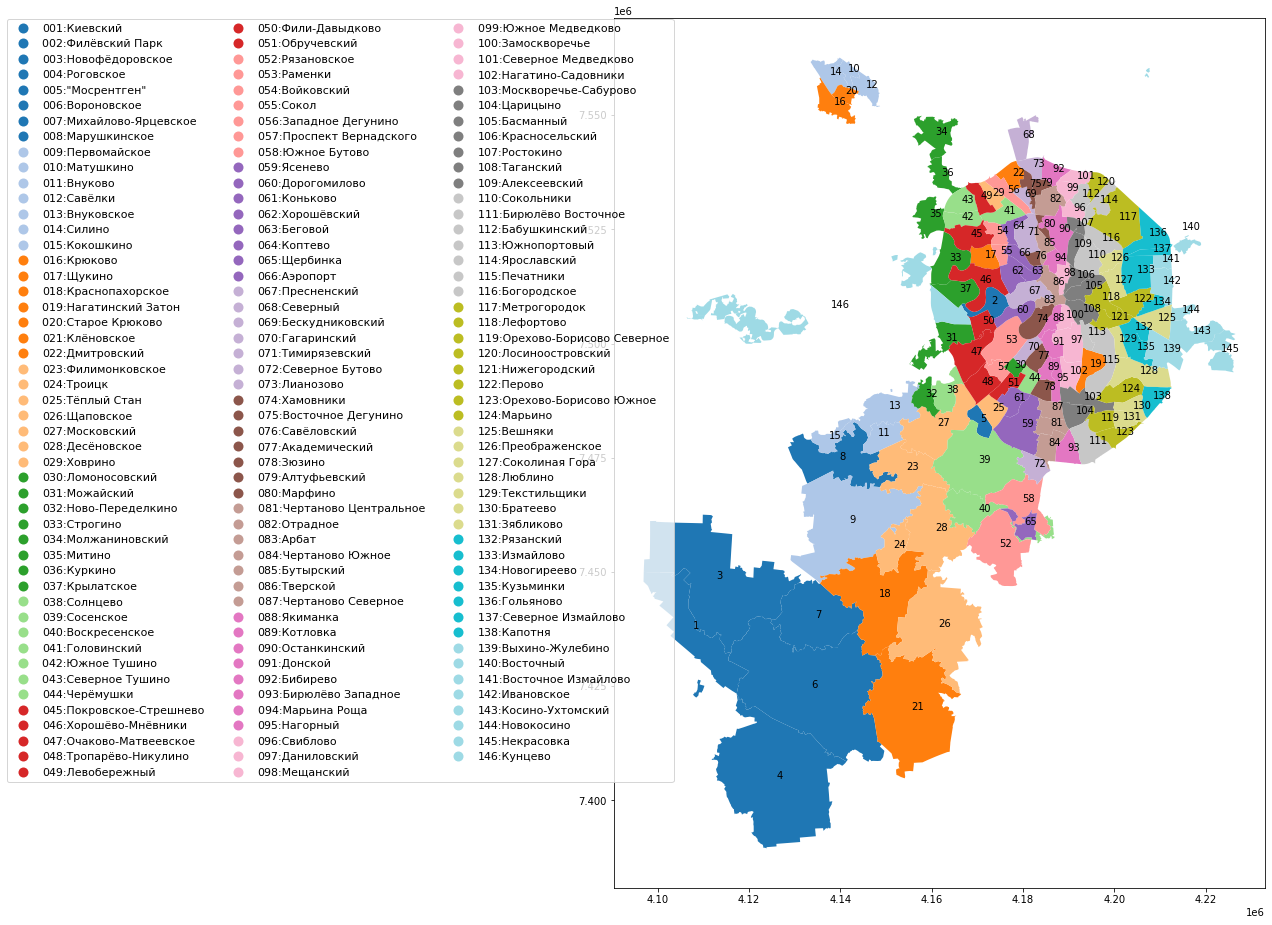

In [ ]:
fig = plt.figure(figsize=(20,16))
area = plt.subplot(1, 1, 1)
data.plot(ax=area, legend=True, 
        #   column="NAME", cmap="tab20",
          column="Title", cmap="tab20",
          linewidth=0.5,
          legend_kwds={"ncol":3, "bbox_to_anchor": (0, 1.005, 0.1, 0),
                       "fontsize":11}
          )

# разместим номер района в центроиде, т.е. в неком "центре тяжести" каждого полигона района
for _, adm in data.iterrows():
    area.annotate(adm.ID, xy=(adm.geometry.centroid.x, adm.geometry.centroid.y))

plt.show()